In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import subprocess
from scipy.stats import chisquare

# import scipy.stats as stats

In [2]:
SFARI_TFs = pd.read_csv("../../data/SFARI_TFs_with_ENST.csv")
SFARI_TFs

,Unnamed: 0.1,Unnamed: 0,status,gene-symbol,gene-name,ensembl-id,chromosome,genetic-category,gene-score,syndromic,eagle,number-of-reports,GeneName,ProteinSeq,uniprotID,ENST
0,0,0,9,ADNP,Activity-dependent neuroprotector homeobox,ENSG00000101126,20,"Rare Single Gene Mutation, Syndromic, Functional",1.0,1,41.50,64,sp|Q9H2P0|ADNP_HUMAN,MFQLPVNNLGSLRKARKTVKKILSDIGLEYCKEHIEDFKQFEPNDF...,Q9H2P0,ENST00000349014.8
1,1,1,9,AHDC1,AT-hook DNA binding motif containing 1,ENSG00000126705,1,"Rare Single Gene Mutation, Syndromic",1.0,1,14.25,24,sp|Q5TGY3|AHDC1_HUMAN,MRVKPQGLVVTSSAVCSSPDYLREPKYYPGGPPTPRPLLPTRPPAS...,Q5TGY3,ENST00000247087.10
2,2,2,9,ARID2,AT-rich interaction domain 2,ENSG00000189079,12,"Rare Single Gene Mutation, Syndromic",2.0,1,NaN,12,sp|Q68CP9|ARID2_HUMAN,MANSTGKAPPDERRKGLAFLDELRQFHHSRGSPFKKIPAVGGKELD...,Q68CP9,ENST00000334344.11
3,3,3,9,ARNT2,aryl-hydrocarbon receptor nuclear translocator 2,ENSG00000172379,15,"Rare Single Gene Mutation, Syndromic, Genetic ...",2.0,0,NaN,15,sp|Q9HBZ2|ARNT2_HUMAN,MATPAAVNPPEMASDIPGSVTLPVAPMAATGQVRMAGAMPARGGKR...,Q9HBZ2,ENST00000303329.9
4,4,4,9,ARX,aristaless related homeobox,ENSG00000004848,X,"Rare Single Gene Mutation, Syndromic",1.0,1,13.80,24,sp|Q96QS3|ARX_HUMAN,MSNQYQEEGCSERPECKSKSPTLLSSYCIDSILGRRSPCKMRLLGA...,Q96QS3,ENST00000379044.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,117,122,9,ZNF711,zinc finger protein 711,ENSG00000147180,X,Rare Single Gene Mutation,2.0,0,NaN,5,sp|Q9Y462|ZN711_HUMAN,MDSGGGSLGLHTPDSRMAHTMIMQDFVAGMAGTAHIDGDHIVVSVP...,Q9Y462,ENST00000276123.7
118,118,123,9,ZNF713,Zinc finger protein 713,ENSG00000178665,7,Rare Single Gene Mutation,2.0,0,NaN,3,sp|Q8N859|ZN713_HUMAN,MEEEEMNDGSQMVRSQESLTFQDVAVDFTREEWDQLYPAQKNLYRD...,Q8N859,ENST00000429591.4
119,119,124,9,ZNF774,Zinc finger protein 774,ENSG00000196391,15,Rare Single Gene Mutation,2.0,0,NaN,4,sp|Q6NX45|ZN774_HUMAN,MWLGTSGKSGLPGHCLENPLQECHPAQLEEWALKGISRPSVISQPE...,Q6NX45,ENST00000354377.8
120,120,125,9,ZNF804A,Zinc finger protein 804A,ENSG00000170396,2,"Rare Single Gene Mutation, Genetic Association...",2.0,0,NaN,16,sp|Q7Z570|Z804A_HUMAN,MECYYIVISSTHLSNGHFRNIKGVFRGPLSKNGNKTLDYAEKENTI...,Q7Z570,ENST00000302277.7


In [3]:
known_ADs = pd.read_csv("../../data/known_ADs_with_seqs.csv", index_col = 0)
known_ADs

,Gene,Start,End,uniprotID,Reference,ProteinRegionSeq
0,TADA2A,112,211,A0A024R0Y4,Stanford,KHYMKHFINNPLFASTLLNLKQAEEAKTADTAIPFHSTDDPPRPTF...
1,BHLHE23,162,241,A0A087WXG3,Stanford,LAKNYILMQAQALDEMRRLVAFLNQGQGLAAPVNAAPLTPFGQATV...
2,RFX7,862,951,A0A669KBM4,Stanford,KEFEPSVSQTNESYFPFDDELTQDSIVEELVLMEQQMSMNNSHSYG...
3,RFX7,1372,1460,A0A669KBM4,Stanford,DLTNTASDFSSDIRLSSELSGSINDLNTLDPNLLFDPGRQQGQDDE...
4,ARGFX,142,315,A6NJG6,Stanford / Stanford,AKQRNQILPSKKNVPTSPRTSPSPYAFSPVISDFYSSLPSQPLDPS...
...,...,...,...,...,...,...
736,PARP3,232,351,Q9Y6F1,Stanford,ALEALEEALKGPTDGGQSLEELSSHFYTVIPHNFGHSQPPPINSPE...
737,TAF6L,372,481,Q9Y6J9,Stanford,MKAQAAEPNRGGPGGRGCRRLDDLPWDSLLFQESSSGGGAEPSFGS...
738,NCOA3,621,1424,Q9Y6Q9,"PMID: 9765300, Soto / Stanford",LLQLLTCSSDDRGHSSLTNSPLDSSCKESSVSVTSPSGVSSSTSGG...
739,CAMTA1,702,841,Q9Y6Y1,Stanford,EVLLKSGELQACSSEHYLQPETNGVIRSAGGVPILPGNVVQGLYPV...


In [4]:
SFARI_TFs_with_known_ADs = SFARI_TFs[SFARI_TFs["uniprotID"].isin(known_ADs["uniprotID"])]
SFARI_TFs_with_known_ADs

,Unnamed: 0.1,Unnamed: 0,status,gene-symbol,gene-name,ensembl-id,chromosome,genetic-category,gene-score,syndromic,eagle,number-of-reports,GeneName,ProteinSeq,uniprotID,ENST
3,3,3,9,ARNT2,aryl-hydrocarbon receptor nuclear translocator 2,ENSG00000172379,15,"Rare Single Gene Mutation, Syndromic, Genetic ...",2.0,0,NaN,15,sp|Q9HBZ2|ARNT2_HUMAN,MATPAAVNPPEMASDIPGSVTLPVAPMAATGQVRMAGAMPARGGKR...,Q9HBZ2,ENST00000303329.9
4,4,4,9,ARX,aristaless related homeobox,ENSG00000004848,X,"Rare Single Gene Mutation, Syndromic",1.0,1,13.80,24,sp|Q96QS3|ARX_HUMAN,MSNQYQEEGCSERPECKSKSPTLLSSYCIDSILGRRSPCKMRLLGA...,Q96QS3,ENST00000379044.5
5,5,5,9,AR,androgen receptor,NaN,X,Genetic Association,2.0,0,NaN,6,sp|P10275|ANDR_HUMAN,MEVQLGLGRVYPRPPSKTYRGAFQNLFQSVREVIQNPGPRHPEAAS...,P10275,ENST00000374690.9
9,9,9,9,CASZ1,castor zinc finger 1,ENSG00000130940,1,Rare Single Gene Mutation,1.0,0,9.55,6,sp|Q86V15|CASZ1_HUMAN,MDLGTAEGTRCTDPPAGKPAMAPKRKGGLKLNAICAKLSRQVVVEK...,Q86V15,ENST00000377022.8
10,10,10,9,CC2D1A,Coiled-coil and C2 domain containing 1A,ENSG00000132024,19,"Rare Single Gene Mutation, Functional",2.0,0,NaN,15,sp|Q6P1N0|C2D1A_HUMAN,MHKRKGPPGPPGRGAAAARQLGLLVDLSPDGLMIPEDGANDEELEA...,Q6P1N0,ENST00000318003.11
11,11,11,9,CAMTA2,calmodulin binding transcription activator 2,ENSG00000108509,17,"Rare Single Gene Mutation, Syndromic",1.0,0,NaN,3,sp|O94983|CMTA2_HUMAN,MNTKDTTEVAENSHHLKIFLPKKLLECLPRCPLLPPERLRWNTNEE...,O94983,ENST00000348066.8
20,20,21,9,EBF3,early B-cell factor 3,ENSG00000108001,10,"Rare Single Gene Mutation, Syndromic, Functional",1.0,1,9.75,18,sp|Q9H4W6|COE3_HUMAN,MFGIQENIPRGGTTMKEEPLGSGMNPVRSWMHTAGVVDANTAAQSG...,Q9H4W6,ENST00000355311.10
21,21,22,9,EGR3,early growth response 3,ENSG00000179388,8,Rare Single Gene Mutation,2.0,0,NaN,3,sp|Q06889|EGR3_HUMAN,MTGKLAEKLPVTMSSLLNQLPDNLYPEEIPSALNLFSGSSDSVVHY...,Q06889,ENST00000317216.3
23,23,24,9,ESR2,estrogen receptor 2 (ER beta),ENSG00000140009,14,"Rare Single Gene Mutation, Syndromic, Genetic ...",2.0,0,NaN,9,sp|Q92731|ESR2_HUMAN,MDIKNSPSSLNSPSSYNCSQSILPLEHGSIYIPSSYVDSHHEYPAM...,Q92731,ENST00000341099.6
28,28,30,9,GLIS1,GLIS family zinc finger 1,ENSG00000174332,1,"Rare Single Gene Mutation, Genetic Association",2.0,0,NaN,3,sp|Q8NBF1|GLIS1_HUMAN,MAEARTSLSAHCRGPLATGLHPDLDLPGRSLATPAPSCYLLGSEPS...,Q8NBF1,ENST00000312233.4


In [5]:
SFARI_TFs_with_known_ADs[["uniprotID"]].to_csv("../../data/SFARI_TFs_with_known_ADs_uniprotIDs.txt",
                               header=None, index=None, sep=' ', mode='a')

In [6]:
uniprot_DBD_output = pd.read_csv("../data/SFARI_TFs_with_known_ADs_DBDs.tsv", sep = "\t")
uniprot_DBD_output

,From,Entry,DNA binding
0,Q9HBZ2,Q9HBZ2,NaN
1,Q96QS3,Q96QS3,"DNA_BIND 328..387; /note=""Homeobox""; /evidence..."
2,P10275,P10275,"DNA_BIND 560..632; /note=""Nuclear receptor""; /..."
3,Q86V15,Q86V15,NaN
4,Q6P1N0,Q6P1N0,NaN
5,O94983,O94983,"DNA_BIND 30..155; /note=""CG-1""; /evidence=""ECO..."
6,Q9H4W6,Q9H4W6,NaN
7,Q06889,Q06889,NaN
8,Q92731,Q92731,"DNA_BIND 149..214; /note=""Nuclear receptor""; /..."
9,Q8NBF1,Q8NBF1,NaN


In [7]:
uniprot_DBD_output["DBD_count"] = uniprot_DBD_output["DNA binding"].str.count("DNA_BIND")
uniprot_DBD_output

,From,Entry,DNA binding,DBD_count
0,Q9HBZ2,Q9HBZ2,NaN,NaN
1,Q96QS3,Q96QS3,"DNA_BIND 328..387; /note=""Homeobox""; /evidence...",1.0
2,P10275,P10275,"DNA_BIND 560..632; /note=""Nuclear receptor""; /...",1.0
3,Q86V15,Q86V15,NaN,NaN
4,Q6P1N0,Q6P1N0,NaN,NaN
5,O94983,O94983,"DNA_BIND 30..155; /note=""CG-1""; /evidence=""ECO...",1.0
6,Q9H4W6,Q9H4W6,NaN,NaN
7,Q06889,Q06889,NaN,NaN
8,Q92731,Q92731,"DNA_BIND 149..214; /note=""Nuclear receptor""; /...",1.0
9,Q8NBF1,Q8NBF1,NaN,NaN


In [8]:
uniprot_DBD_output["DBD_split"] = uniprot_DBD_output["DNA binding"].str.split("DNA_bind")
uniprot_DBD_output

,From,Entry,DNA binding,DBD_count,DBD_split
0,Q9HBZ2,Q9HBZ2,NaN,NaN,NaN
1,Q96QS3,Q96QS3,"DNA_BIND 328..387; /note=""Homeobox""; /evidence...",1.0,"[DNA_BIND 328..387; /note=""Homeobox""; /evidenc..."
2,P10275,P10275,"DNA_BIND 560..632; /note=""Nuclear receptor""; /...",1.0,"[DNA_BIND 560..632; /note=""Nuclear receptor""; ..."
3,Q86V15,Q86V15,NaN,NaN,NaN
4,Q6P1N0,Q6P1N0,NaN,NaN,NaN
5,O94983,O94983,"DNA_BIND 30..155; /note=""CG-1""; /evidence=""ECO...",1.0,"[DNA_BIND 30..155; /note=""CG-1""; /evidence=""EC..."
6,Q9H4W6,Q9H4W6,NaN,NaN,NaN
7,Q06889,Q06889,NaN,NaN,NaN
8,Q92731,Q92731,"DNA_BIND 149..214; /note=""Nuclear receptor""; /...",1.0,"[DNA_BIND 149..214; /note=""Nuclear receptor""; ..."
9,Q8NBF1,Q8NBF1,NaN,NaN,NaN


In [9]:
DBDs = uniprot_DBD_output.explode("DBD_split")
DBDs = DBDs.dropna()
DBDs

,From,Entry,DNA binding,DBD_count,DBD_split
1,Q96QS3,Q96QS3,"DNA_BIND 328..387; /note=""Homeobox""; /evidence...",1.0,"DNA_BIND 328..387; /note=""Homeobox""; /evidence..."
2,P10275,P10275,"DNA_BIND 560..632; /note=""Nuclear receptor""; /...",1.0,"DNA_BIND 560..632; /note=""Nuclear receptor""; /..."
5,O94983,O94983,"DNA_BIND 30..155; /note=""CG-1""; /evidence=""ECO...",1.0,"DNA_BIND 30..155; /note=""CG-1""; /evidence=""ECO..."
8,Q92731,Q92731,"DNA_BIND 149..214; /note=""Nuclear receptor""; /...",1.0,"DNA_BIND 149..214; /note=""Nuclear receptor""; /..."
10,P11308,P11308,"DNA_BIND 311..391; /note=""ETS""; /evidence=""ECO...",1.0,"DNA_BIND 311..391; /note=""ETS""; /evidence=""ECO..."
16,Q03164,Q03164,"DNA_BIND 169..180; /note=""A.T hook 1""; DNA_BIN...",3.0,"DNA_BIND 169..180; /note=""A.T hook 1""; DNA_BIN..."
17,Q06413,Q06413,"DNA_BIND 58..86; /note=""Mef2-type""; /evidence=...",1.0,"DNA_BIND 58..86; /note=""Mef2-type""; /evidence=..."
18,O14770,O14770,"DNA_BIND 276..338; /note=""Homeobox; TALE-type""...",1.0,"DNA_BIND 276..338; /note=""Homeobox; TALE-type""..."
19,P35548,P35548,"DNA_BIND 142..201; /note=""Homeobox""; /evidence...",1.0,"DNA_BIND 142..201; /note=""Homeobox""; /evidence..."
24,Q12857,Q12857,"DNA_BIND 1..194; /note=""CTF/NF-I""; /evidence=""...",1.0,"DNA_BIND 1..194; /note=""CTF/NF-I""; /evidence=""..."


In [11]:
DBDs["Start"] = DBDs["DBD_split"].str.extract(r'DNA_BIND (\d*)\.\.')
DBDs["End"] = DBDs["DBD_split"].str.extract(r'DNA_BIND \d*\.\.(\d*)')
DBDs = DBDs[["From", "Start", "End"]]
DBDs = DBDs.rename(columns = {"From" : "uniprotID"})
DBDs["Start"] = DBDs["Start"].astype(int)
DBDs["End"] = DBDs["End"].astype(int)
DBDs.to_csv("../data/DBD_coords_SFARI_TFs_with_ADs_and_DBDs.csv")
DBDs

,uniprotID,Start,End
1,Q96QS3,328,387
2,P10275,560,632
5,O94983,30,155
8,Q92731,149,214
10,P11308,311,391
16,Q03164,169,180
17,Q06413,58,86
18,O14770,276,338
19,P35548,142,201
24,Q12857,1,194


In [12]:
DBDs.to_csv("../../data/SFARI_TFs_with_known_ADs_DBD_coords.csv")

Ran mapping_AA_coords_to_bed.R script

In [12]:
! python3 ../scripts/get_full_mutations.py --variants_filename iWES_v2_variants.bed --sort_TFs true

Sorting TF bed files.
1 ENST00000575354.bed
2 ENST00000474710.bed
3 ENST00000356073.bed
4 ENST00000418153.bed
5 ENST00000580243.bed
6 ENST00000529006.bed
7 ENST00000380959.bed
8 ENST00000642384.bed
9 ENST00000329705.bed
10 ENST00000348066.bed
11 ENST00000260926.bed
12 ENST00000334344.bed
13 ENST00000379044.bed
14 ENST00000392783.bed
15 lengths
Error: The requested file (../outputs/mutations/cds_bed_format/lengths) could not be opened. Error message: (Is a directory). Exiting!
16 ENST00000508784.bed
17 ENST00000246672.bed
18 ENST00000327111.bed
19 ENST00000297375.bed
20 ENST00000313071.bed
21 ENST00000264010.bed
22 ENST00000269468.bed
23 ENST00000359971.bed
24 ENST00000312233.bed
25 ENST00000317216.bed
26 ENST00000056233.bed
27 ENST00000601440.bed
28 ENST00000673997.bed
29 ENST00000382409.bed
30 ENST00000335670.bed
31 ENST00000303329.bed
32 ENST00000338745.bed
33 ENST00000393883.bed
34 ENST00000373036.bed
35 ENST00000354377.bed
36 ENST00000359486.bed
37 ENST00000389506.bed
38 ENST000001

In [13]:
! python3 ../scripts/classify_mutations.py --variants_filename iWES_v2_variants.bed

^C
Traceback (most recent call last):
  File "../scripts/classify_mutations.py", line 25, in <module>
    for record in SeqIO.parse("../raw_files/gencode.v36.pc_translations.fa", "fasta"):
  File "/Applications/anaconda3/lib/python3.8/site-packages/Bio/SeqIO/Interfaces.py", line 72, in __next__
    return next(self.records)
  File "/Applications/anaconda3/lib/python3.8/site-packages/Bio/SeqIO/FastaIO.py", line 245, in iterate
    yield SeqRecord(
  File "/Applications/anaconda3/lib/python3.8/site-packages/Bio/SeqRecord.py", line 222, in __init__
    if seq is None:
KeyboardInterrupt


In [14]:
! python3 ../scripts/get_mutations_domains_snv_classified.py --domain AD --variants_filename iWES_v2_variants.bed

^C
Traceback (most recent call last):
  File "../scripts/get_mutations_domains_snv_classified.py", line 22, in <module>
    import pandas as pd
  File "/Applications/anaconda3/lib/python3.8/site-packages/pandas/__init__.py", line 48, in <module>
    from pandas.core.api import (
  File "/Applications/anaconda3/lib/python3.8/site-packages/pandas/core/api.py", line 29, in <module>
    from pandas.core.arrays import Categorical
  File "/Applications/anaconda3/lib/python3.8/site-packages/pandas/core/arrays/__init__.py", line 20, in <module>
    from pandas.core.arrays.string_arrow import ArrowStringArray
  File "/Applications/anaconda3/lib/python3.8/site-packages/pandas/core/arrays/string_arrow.py", line 68, in <module>
    import pyarrow.compute as pc
  File "/Applications/anaconda3/lib/python3.8/site-packages/pyarrow/compute.py", line 90, in <module>
    from pyarrow.vendored import docscrape
  File "/Applications/anaconda3/lib/python3.8/site-packages/pyarrow/vendored/docscrape.py", line

In [15]:
! python3 ../scripts/get_mutations_domains_snv_classified.py --domain DBD --variants_filename iWES_v2_variants.bed

^C
Traceback (most recent call last):
  File "../scripts/get_mutations_domains_snv_classified.py", line 22, in <module>
    import pandas as pd
  File "/Applications/anaconda3/lib/python3.8/site-packages/pandas/__init__.py", line 48, in <module>
    from pandas.core.api import (
  File "/Applications/anaconda3/lib/python3.8/site-packages/pandas/core/api.py", line 48, in <module>
    from pandas.core.groupby import (
  File "/Applications/anaconda3/lib/python3.8/site-packages/pandas/core/groupby/__init__.py", line 1, in <module>
    from pandas.core.groupby.generic import (
  File "/Applications/anaconda3/lib/python3.8/site-packages/pandas/core/groupby/generic.py", line 73, in <module>
    from pandas.core.groupby.groupby import (
  File "/Applications/anaconda3/lib/python3.8/site-packages/pandas/core/groupby/groupby.py", line 44, in <module>
    import pandas._libs.groupby as libgroupby
  File "pandas/_libs/groupby.pyx", line 1, in init pandas._libs.groupby
  File "<frozen importlib._b

In [16]:
TFs_with_DBD_and_AD_uniprotIDs = DBDs["uniprotID"]
TFs_with_DBD_and_AD_uniprotIDs

1     Q96QS3
2     P10275
5     O94983
8     Q92731
10    P11308
16    Q03164
17    Q06413
18    O14770
19    P35548
24    Q12857
25    Q14938
26    P20393
27    P43354
28    O95096
29    P32242
30    Q02548
31    P26367
32    P78337
33    P35398
35    Q6ZRS2
36    Q9Y458
37    Q9UGU0
39    Q9NQB0
42    P10827
44    P11473
Name: uniprotID, dtype: object

In [17]:
SFARI_TFs = pd.read_csv("../../data/SFARI_TFs_with_ENST.csv")
SFARI_TFs

,Unnamed: 0.1,Unnamed: 0,status,gene-symbol,gene-name,ensembl-id,chromosome,genetic-category,gene-score,syndromic,eagle,number-of-reports,GeneName,ProteinSeq,uniprotID,ENST
0,0,0,9,ADNP,Activity-dependent neuroprotector homeobox,ENSG00000101126,20,"Rare Single Gene Mutation, Syndromic, Functional",1.0,1,41.50,64,sp|Q9H2P0|ADNP_HUMAN,MFQLPVNNLGSLRKARKTVKKILSDIGLEYCKEHIEDFKQFEPNDF...,Q9H2P0,ENST00000349014.8
1,1,1,9,AHDC1,AT-hook DNA binding motif containing 1,ENSG00000126705,1,"Rare Single Gene Mutation, Syndromic",1.0,1,14.25,24,sp|Q5TGY3|AHDC1_HUMAN,MRVKPQGLVVTSSAVCSSPDYLREPKYYPGGPPTPRPLLPTRPPAS...,Q5TGY3,ENST00000247087.10
2,2,2,9,ARID2,AT-rich interaction domain 2,ENSG00000189079,12,"Rare Single Gene Mutation, Syndromic",2.0,1,NaN,12,sp|Q68CP9|ARID2_HUMAN,MANSTGKAPPDERRKGLAFLDELRQFHHSRGSPFKKIPAVGGKELD...,Q68CP9,ENST00000334344.11
3,3,3,9,ARNT2,aryl-hydrocarbon receptor nuclear translocator 2,ENSG00000172379,15,"Rare Single Gene Mutation, Syndromic, Genetic ...",2.0,0,NaN,15,sp|Q9HBZ2|ARNT2_HUMAN,MATPAAVNPPEMASDIPGSVTLPVAPMAATGQVRMAGAMPARGGKR...,Q9HBZ2,ENST00000303329.9
4,4,4,9,ARX,aristaless related homeobox,ENSG00000004848,X,"Rare Single Gene Mutation, Syndromic",1.0,1,13.80,24,sp|Q96QS3|ARX_HUMAN,MSNQYQEEGCSERPECKSKSPTLLSSYCIDSILGRRSPCKMRLLGA...,Q96QS3,ENST00000379044.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,117,122,9,ZNF711,zinc finger protein 711,ENSG00000147180,X,Rare Single Gene Mutation,2.0,0,NaN,5,sp|Q9Y462|ZN711_HUMAN,MDSGGGSLGLHTPDSRMAHTMIMQDFVAGMAGTAHIDGDHIVVSVP...,Q9Y462,ENST00000276123.7
118,118,123,9,ZNF713,Zinc finger protein 713,ENSG00000178665,7,Rare Single Gene Mutation,2.0,0,NaN,3,sp|Q8N859|ZN713_HUMAN,MEEEEMNDGSQMVRSQESLTFQDVAVDFTREEWDQLYPAQKNLYRD...,Q8N859,ENST00000429591.4
119,119,124,9,ZNF774,Zinc finger protein 774,ENSG00000196391,15,Rare Single Gene Mutation,2.0,0,NaN,4,sp|Q6NX45|ZN774_HUMAN,MWLGTSGKSGLPGHCLENPLQECHPAQLEEWALKGISRPSVISQPE...,Q6NX45,ENST00000354377.8
120,120,125,9,ZNF804A,Zinc finger protein 804A,ENSG00000170396,2,"Rare Single Gene Mutation, Genetic Association...",2.0,0,NaN,16,sp|Q7Z570|Z804A_HUMAN,MECYYIVISSTHLSNGHFRNIKGVFRGPLSKNGNKTLDYAEKENTI...,Q7Z570,ENST00000302277.7


In [4]:
import os
d_domains = "../outputs/mutations/domains_iWES_v2_variants_snv_classified/DBD"
files = os.listdir(d_domains)
ENST_codes = [f.replace(".bed", "") for f in files]
ENST_codes

['ENST00000348066',
 'ENST00000379044',
 'ENST00000246672',
 'ENST00000335670',
 'ENST00000359486',
 'ENST00000389506',
 'ENST00000265340',
 'ENST00000377142',
 'ENST00000561208',
 'ENST00000339562',
 'ENST00000437473',
 'ENST00000373294',
 'ENST00000241001',
 'ENST00000395324',
 'ENST00000403491',
 'ENST00000374690',
 'ENST00000592199',
 'ENST00000355995',
 'ENST00000398919',
 'ENST00000262518',
 'ENST00000264637',
 'ENST00000239243',
 'ENST00000358127',
 'ENST00000282549',
 'ENST00000341099']

In [19]:
SFARI_TF_known_ADs = pd.read_csv("../../output/SFARI_TF_known_ADs.csv", index_col = 0)

SFARI_TFs_with_known_ADs = SFARI_TFs[SFARI_TFs["uniprotID"].isin(SFARI_TF_known_ADs["uniprotID"])]

In [20]:
uniprotID_ENST_mapping = pd.read_csv("../../data/SFARI_TFs_with_ENST.csv")
uniprotID_ENST_mapping = uniprotID_ENST_mapping[["uniprotID", "ENST"]]
uniprotID_ENST_mapping["ENST"] = uniprotID_ENST_mapping["ENST"].str.split(".").str[0]
uniprotID_ENST_mapping_dict= dict(zip(uniprotID_ENST_mapping["ENST"], uniprotID_ENST_mapping["uniprotID"]))
uniprotID_ENST_mapping_dict

{'ENST00000349014': 'Q9H2P0',
 'ENST00000247087': 'Q5TGY3',
 'ENST00000334344': 'Q68CP9',
 'ENST00000303329': 'Q9HBZ2',
 'ENST00000379044': 'Q96QS3',
 'ENST00000374690': 'P10275',
 'ENST00000368346': 'Q9NR48',
 'ENST00000392783': 'Q9UIF8',
 'ENST00000642384': 'Q9H165',
 'ENST00000377022': 'Q86V15',
 'ENST00000318003': 'Q6P1N0',
 'ENST00000348066': 'O94983',
 'ENST00000361283': 'Q96JM3',
 'ENST00000575354': 'Q96RK0',
 'ENST00000264010': 'P49711',
 'ENST00000292535': 'P39880',
 'ENST00000292538': 'Q13948',
 'ENST00000261726': 'O14529',
 'ENST00000382409': 'O75398',
 'ENST00000234198': 'Q07687',
 'ENST00000355311': 'Q9H4W6',
 'ENST00000317216': 'Q06889',
 'ENST00000297375': 'P19622',
 'ENST00000341099': 'Q92731',
 'ENST00000283268': 'Q8TBJ5',
 'ENST00000313071': 'P55316',
 'ENST00000318789': 'Q9H334',
 'ENST00000350908': 'O15409',
 'ENST00000312233': 'Q8NBF1',
 'ENST00000398919': 'P11308',
 'ENST00000573035': 'P78347',
 'ENST00000012134': 'P31629',
 'ENST00000372583': 'Q5T1R4',
 'ENST0000

In [20]:
# Uses bedtools jaccard function to get nucleotide length of CDS
def return_cds_len(folder, code):
    subprocess.call("bedtools jaccard -a ../outputs/mutations/" + folder + "/sorted/" + code + ".bed \
    -b ../outputs/mutations/" + folder + "/sorted/" + code + ".bed \
    > ../outputs/mutations/" + folder + "/lengths/" + code + ".bed", shell = True) 
    cds_len = pd.read_csv("../outputs/mutations/" + folder + "/lengths/" + code + ".bed", sep = "\t")["intersection"][0]
    return cds_len

def sort_folder(folder):
    directory = "../outputs/mutations/" + folder 
    files = os.listdir(directory)
    i = 1
    for file in files:  
        if os.path.isdir(directory + "/" + file):
            # skip directories
            continue
        # print(i, file) # gene.bed
        name = file.split(".")[0] # gene
        # print("bedtools sort -i " + directory + "/" + file + " > ../outputs/mutations/cds_bed_format_sorted/" + name + ".bed")
        subprocess.call("bedtools sort -i " + directory + "/" + file + " > " + directory + "/sorted/" + name + ".bed", shell = True)
        i+=1

In [23]:
tf_lengths, uniprotIDs, AD_lengths, cds_no_syns, AD_no_syns = [],[],[],[],[]
DBD_lengths, DBD_no_syns = [], []

i = 1
# Buiding a dataframe
for ENST_code in ENST_codes:
    print(i, ENST_code)
    i += 1
    SFARI_TFs_rows = SFARI_TFs[SFARI_TFs["ENST"].str.contains(ENST_code)]
    
    # Get TF length
    tf_lengths.append(return_cds_len("cds_bed_format", ENST_code))
    
    # Get uniprotID
    uniprotID = SFARI_TFs_rows["uniprotID"].iloc[0]
    uniprotIDs.append(uniprotID)
    
    
    # Sort ADs
    sort_folder("domains_bed_format/AD")
        
    # Sort DBDs
    sort_folder("domains_bed_format/DBD")
    
    # Get sum of AD lengths
    AD_lengths.append(return_cds_len("domains_bed_format/AD", uniprotID))
    
    # Get sum of DBD lengths
    DBD_lengths.append(return_cds_len("domains_bed_format/DBD", uniprotID))
    
    # Count # rows that are non-syn in CDS clinvar annotated
    cds_clinvar = pd.read_csv("../outputs/mutations/cds_iWES_v2_variants_snv_classified/" + ENST_code + ".bed", sep = "\t", header = None)
    cds_no_syn_count = cds_clinvar[13].value_counts().loc["No-Syn"]
    cds_no_syns.append(cds_no_syn_count)
    
    # Count # rows that are non-syn in AD clinvar annotated
    AD_clinvar = pd.read_csv("../outputs/mutations/domains_iWES_v2_variants_snv_classified/AD/" + ENST_code + ".bed", sep = "\t", header = None)
    # display(domain_clinvar)
    if sum(AD_clinvar[19].str.contains("No-Syn")) > 0:
        AD_no_syn_count = AD_clinvar[19].value_counts().loc["No-Syn"]
        # display(domain_clinvar)
    else: 
        AD_no_syn_count = 0
    AD_no_syns.append(AD_no_syn_count)
    
    # Count # rows that are non-syn in DBD clinvar annotated
    DBD_clinvar = pd.read_csv("../outputs/mutations/domains_iWES_v2_variants_snv_classified/DBD/" + ENST_code + ".bed", sep = "\t", header = None)
    # display(domain_clinvar)
    if sum(DBD_clinvar[19].str.contains("No-Syn")) > 0:
        DBD_no_syn_count = DBD_clinvar[19].value_counts().loc["No-Syn"]
        # display(domain_clinvar)
    else: 
        DBD_no_syn_count = 0
    DBD_no_syns.append(DBD_no_syn_count)

1 ENST00000348066
2 ENST00000379044
3 ENST00000246672
4 ENST00000335670
5 ENST00000359486
6 ENST00000389506
7 ENST00000265340
8 ENST00000377142
9 ENST00000561208
10 ENST00000339562
11 ENST00000437473
12 ENST00000373294
13 ENST00000241001
14 ENST00000395324
15 ENST00000403491
16 ENST00000374690
17 ENST00000592199
18 ENST00000355995
19 ENST00000398919
20 ENST00000262518
21 ENST00000264637
22 ENST00000239243
23 ENST00000358127
24 ENST00000282549
25 ENST00000341099


In [43]:
results = pd.DataFrame(data = {"uniprotID": uniprotIDs,
                               "TF_cds_length": tf_lengths,
                               "AD_cds_length" : AD_lengths, 
                               "DBD_cds_length": DBD_lengths,
              "TF_missense" : cds_no_syns, 
              "AD_missense" : AD_no_syns,
                              "DBD_missense" : DBD_no_syns})
results

,uniprotID,TF_cds_length,AD_cds_length,DBD_cds_length,TF_missense,AD_missense,DBD_missense
0,O94983,3609,882,378,346,95,30
1,Q96QS3,1689,273,180,150,16,10
2,P20393,1845,834,231,233,108,25
3,P35398,1572,342,198,142,31,4
4,Q9UGU0,5883,981,45,622,99,1
5,Q03164,11910,420,36,887,20,3
6,P78337,945,150,180,109,18,16
7,O95096,822,162,180,116,26,25
8,O14770,1434,414,189,128,36,8
9,P43354,1797,315,228,165,20,19


In [44]:
results["AD_prop"] = results["AD_missense"] / results["AD_cds_length"]
results["DBD_prop"] = results["DBD_missense"] / results["DBD_cds_length"]
results["TF_prop"] = results["TF_missense"] / results["TF_cds_length"]
results

,uniprotID,TF_cds_length,AD_cds_length,DBD_cds_length,TF_missense,AD_missense,DBD_missense,AD_prop,DBD_prop,TF_prop
0,O94983,3609,882,378,346,95,30,0.107710,0.079365,0.095871
1,Q96QS3,1689,273,180,150,16,10,0.058608,0.055556,0.088810
2,P20393,1845,834,231,233,108,25,0.129496,0.108225,0.126287
3,P35398,1572,342,198,142,31,4,0.090643,0.020202,0.090331
4,Q9UGU0,5883,981,45,622,99,1,0.100917,0.022222,0.105728
5,Q03164,11910,420,36,887,20,3,0.047619,0.083333,0.074475
6,P78337,945,150,180,109,18,16,0.120000,0.088889,0.115344
7,O95096,822,162,180,116,26,25,0.160494,0.138889,0.141119
8,O14770,1434,414,189,128,36,8,0.086957,0.042328,0.089261
9,P43354,1797,315,228,165,20,19,0.063492,0.083333,0.091820


In [46]:
results.to_csv("../outputs/AD_DBD_SPARK_TFs_iWES_v2_results.csv")

In [28]:
import numpy as np
from scipy import stats

stats.ttest_ind(results["AD_prop"], results["DBD_prop"])

Ttest_indResult(statistic=2.3562095977536104, pvalue=0.022593151079409044)

In [29]:
results["AD_prop"].mean()

0.0961371815484049

In [30]:
results["DBD_prop"].mean()

0.07378141389844135

(array([2., 1., 4., 5., 5., 1., 2., 2., 2., 1.]),
 array([0.05424837, 0.06293545, 0.07162254, 0.08030962, 0.08899671,
        0.09768379, 0.10637088, 0.11505796, 0.12374505, 0.13243214,
        0.14111922]),
 <BarContainer object of 10 artists>)

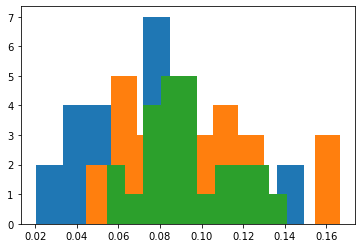

In [31]:
plt.hist(results["DBD_prop"])
plt.hist(results["AD_prop"])
plt.hist(results["TF_prop"])

<AxesSubplot:ylabel='Density'>

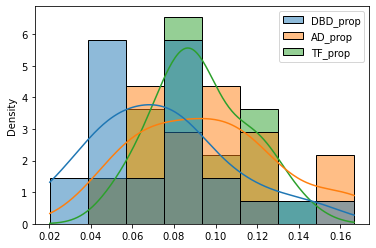

In [32]:
sns.histplot(results[["DBD_prop", "AD_prop", "TF_prop"]], kde = True, stat = "density")

<AxesSubplot:ylabel='Count'>

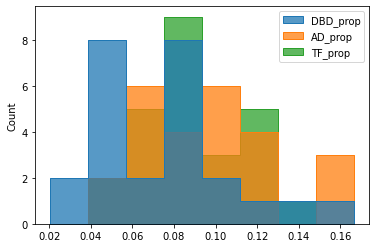

In [33]:
sns.histplot(results[["DBD_prop", "AD_prop", "TF_prop"]], element = "step")

<AxesSubplot:ylabel='Density'>

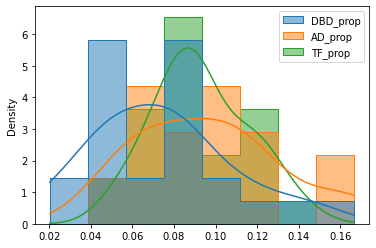

In [34]:
sns.histplot(results[["DBD_prop", "AD_prop", "TF_prop"]], element = "step", kde = True, stat = "density")

Text(0, 0.5, 'Density of TFs')

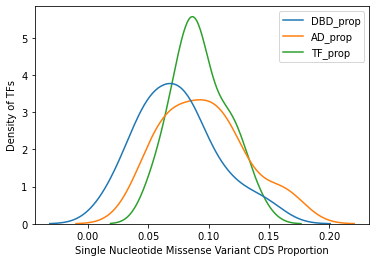

In [35]:
sns.kdeplot(data = results[["DBD_prop", "AD_prop", "TF_prop"]])
plt.xlabel("Single Nucleotide Missense Variant CDS Proportion")
plt.ylabel("Density of TFs")

In [36]:
results

,uniprotID,TF_cds_length,AD_cds_length,DBD_cds_length,TF_missense,AD_missense,DBD_missense,AD_prop,DBD_prop,TF_prop
0,O94983,3609,882,378,346,95,30,0.107710,0.079365,0.095871
1,Q96QS3,1689,273,180,150,16,10,0.058608,0.055556,0.088810
2,P20393,1845,834,231,233,108,25,0.129496,0.108225,0.126287
3,P35398,1572,342,198,142,31,4,0.090643,0.020202,0.090331
4,Q9UGU0,5883,981,45,622,99,1,0.100917,0.022222,0.105728
5,Q03164,11910,420,36,887,20,3,0.047619,0.083333,0.074475
6,P78337,945,150,180,109,18,16,0.120000,0.088889,0.115344
7,O95096,822,162,180,116,26,25,0.160494,0.138889,0.141119
8,O14770,1434,414,189,128,36,8,0.086957,0.042328,0.089261
9,P43354,1797,315,228,165,20,19,0.063492,0.083333,0.091820


In [37]:
chi_sq_p_vals = []
for i in results.index:
    exp_freq = results["TF_missense"].iloc[i] / results["TF_cds_length"].iloc[i] 
    
    AD_obs = results["AD_missense"].iloc[i] 
    AD_exp = exp_freq * results["AD_cds_length"].iloc[i] 
    
    DBD_obs = results["DBD_missense"].iloc[i]
    DBD_exp = exp_freq * results["DBD_cds_length"].iloc[i]
    
    non_AD_DBD_obs = results["TF_missense"].iloc[i] - AD_obs - DBD_obs
    non_AD_DBD_exp = exp_freq * (results["TF_cds_length"].iloc[i] - results["AD_cds_length"].iloc[i] - results["DBD_cds_length"].iloc[i])
    
    chi_sq_p_vals.append(chisquare(f_obs = [AD_obs, DBD_obs, non_AD_DBD_obs], f_exp = [AD_exp, DBD_exp, non_AD_DBD_exp])[1])

results["chi_sq_p_val"] = chi_sq_p_vals
results

,uniprotID,TF_cds_length,AD_cds_length,DBD_cds_length,TF_missense,AD_missense,DBD_missense,AD_prop,DBD_prop,TF_prop,chi_sq_p_val
0,O94983,3609,882,378,346,95,30,0.107710,0.079365,0.095871,2.949397e-01
1,Q96QS3,1689,273,180,150,16,10,0.058608,0.055556,0.088810,3.190092e-02
2,P20393,1845,834,231,233,108,25,0.129496,0.108225,0.126287,7.091138e-01
3,P35398,1572,342,198,142,31,4,0.090643,0.020202,0.090331,1.647493e-03
4,Q9UGU0,5883,981,45,622,99,1,0.100917,0.022222,0.105728,1.898867e-01
5,Q03164,11910,420,36,887,20,3,0.047619,0.083333,0.074475,1.196572e-01
6,P78337,945,150,180,109,18,16,0.120000,0.088889,0.115344,5.083567e-01
7,O95096,822,162,180,116,26,25,0.160494,0.138889,0.141119,7.603804e-01
8,O14770,1434,414,189,128,36,8,0.086957,0.042328,0.089261,5.004278e-02
9,P43354,1797,315,228,165,20,19,0.063492,0.083333,0.091820,1.383663e-01


In [38]:
results[results["chi_sq_p_val"] < 0.05]

,uniprotID,TF_cds_length,AD_cds_length,DBD_cds_length,TF_missense,AD_missense,DBD_missense,AD_prop,DBD_prop,TF_prop,chi_sq_p_val
1,Q96QS3,1689,273,180,150,16,10,0.058608,0.055556,0.088810,3.190092e-02
3,P35398,1572,342,198,142,31,4,0.090643,0.020202,0.090331,1.647493e-03
17,Q9NQB0,1860,300,207,165,18,9,0.060000,0.043478,0.088710,5.935455e-03
18,P11308,1461,549,243,136,86,27,0.156648,0.111111,0.093087,1.833025e-11
20,P10827,1473,156,225,107,26,15,0.166667,0.066667,0.072641,2.329315e-05
22,Q02548,1176,165,381,101,20,16,0.121212,0.041995,0.085884,1.404514e-03


In [40]:
# Multiple hypothesis test correction
chi_sq_sig = results[results["chi_sq_p_val"] < (0.05 / 25)]
chi_sq_sig

,uniprotID,TF_cds_length,AD_cds_length,DBD_cds_length,TF_missense,AD_missense,DBD_missense,AD_prop,DBD_prop,TF_prop,chi_sq_p_val
3,P35398,1572,342,198,142,31,4,0.090643,0.020202,0.090331,1.647493e-03
18,P11308,1461,549,243,136,86,27,0.156648,0.111111,0.093087,1.833025e-11
20,P10827,1473,156,225,107,26,15,0.166667,0.066667,0.072641,2.329315e-05
22,Q02548,1176,165,381,101,20,16,0.121212,0.041995,0.085884,1.404514e-03


In [41]:
pd.merge(chi_sq_sig, SFARI_TFs, on = "uniprotID")

,uniprotID,TF_cds_length,AD_cds_length,DBD_cds_length,TF_missense,AD_missense,DBD_missense,AD_prop,DBD_prop,TF_prop,...,ensembl-id,chromosome,genetic-category,gene-score,syndromic,eagle,number-of-reports,GeneName,ProteinSeq,ENST
0,P35398,1572,342,198,142,31,4,0.090643,0.020202,0.090331,...,ENSG00000069667,15,"Rare Single Gene Mutation, Syndromic, Genetic ...",NaN,1,NaN,21,sp|P35398|RORA_HUMAN,MESAPAAPDPAASEPGSSGADAAAGSRETPLNQESARKSEPPAPVR...,ENST00000335670.11
1,P11308,1461,549,243,136,86,27,0.156648,0.111111,0.093087,...,ENSG00000157554,21,Genetic Association,2.0,0,NaN,1,sp|P11308|ERG_HUMAN,MIQTVPDPAAHIKEALSVVSEDQSLFECAYGTPHLAKTEMTASSSS...,ENST00000398919.6
2,P10827,1473,156,225,107,26,15,0.166667,0.066667,0.072641,...,ENSG00000126351,17,"Rare Single Gene Mutation, Functional",2.0,0,NaN,5,sp|P10827|THA_HUMAN,MEQKPSKVECGSDPEENSARSPDGKRKRKNGQCSLKTSMSGYIPSY...,ENST00000264637.8
3,Q02548,1176,165,381,101,20,16,0.121212,0.041995,0.085884,...,ENSG00000196092,9,Rare Single Gene Mutation,1.0,0,5.75,10,sp|Q02548|PAX5_HUMAN,MDLEKNYPTPRTSRTGHGGVNQLGGVFVNGRPLPDVVRQRIVELAH...,ENST00000358127.9


In [42]:
SFARI_TFs[SFARI_TFs["uniprotID"].isin(chi_sq_sig["uniprotID"])]

,Unnamed: 0.1,Unnamed: 0,status,gene-symbol,gene-name,ensembl-id,chromosome,genetic-category,gene-score,syndromic,eagle,number-of-reports,GeneName,ProteinSeq,uniprotID,ENST
29,29,31,9,ERG,"ERG, ETS transcription factor",ENSG00000157554,21,Genetic Association,2.0,0,NaN,1,sp|P11308|ERG_HUMAN,MIQTVPDPAAHIKEALSVVSEDQSLFECAYGTPHLAKTEMTASSSS...,P11308,ENST00000398919.6
65,65,68,9,PAX5,Paired box 5,ENSG00000196092,9,Rare Single Gene Mutation,1.0,0,5.75,10,sp|Q02548|PAX5_HUMAN,MDLEKNYPTPRTSRTGHGGVNQLGGVFVNGRPLPDVVRQRIVELAH...,Q02548,ENST00000358127.9
75,75,78,9,RORA,RAR-related orphan receptor A,ENSG00000069667,15,"Rare Single Gene Mutation, Syndromic, Genetic ...",NaN,1,NaN,21,sp|P35398|RORA_HUMAN,MESAPAAPDPAASEPGSSGADAAAGSRETPLNQESARKSEPPAPVR...,P35398,ENST00000335670.11
100,100,104,9,THRA,thyroid hormone receptor alpha,ENSG00000126351,17,"Rare Single Gene Mutation, Functional",2.0,0,NaN,5,sp|P10827|THA_HUMAN,MEQKPSKVECGSDPEENSARSPDGKRKRKNGQCSLKTSMSGYIPSY...,P10827,ENST00000264637.8


---
Rerunning with expanded variants

In [50]:
! cp -R ../outputs/mutations/cds_iWES_v2_variants ../outputs/mutations/cds_expanded_iWES_v2_variants

In [52]:
! python3 ../scripts/get_full_mutations.py --variants_filename expanded_iWES_v2_variants.bed --sort_TFs true --sort_variants true

Sorting TF bed files.
1 ENST00000575354.bed
2 ENST00000474710.bed
3 ENST00000356073.bed
4 ENST00000418153.bed
5 ENST00000580243.bed
6 ENST00000529006.bed
7 ENST00000380959.bed
8 ENST00000642384.bed
9 ENST00000329705.bed
10 ENST00000348066.bed
11 ENST00000260926.bed
12 ENST00000334344.bed
13 ENST00000379044.bed
14 ENST00000392783.bed
15 lengths
Error: The requested file (../outputs/mutations/cds_bed_format/lengths) could not be opened. Error message: (Is a directory). Exiting!
16 ENST00000508784.bed
17 ENST00000246672.bed
18 ENST00000327111.bed
19 ENST00000297375.bed
20 ENST00000313071.bed
21 ENST00000264010.bed
22 ENST00000269468.bed
23 ENST00000359971.bed
24 ENST00000312233.bed
25 ENST00000317216.bed
26 ENST00000056233.bed
27 ENST00000601440.bed
28 ENST00000673997.bed
29 ENST00000382409.bed
30 ENST00000335670.bed
31 ENST00000303329.bed
32 ENST00000338745.bed
33 ENST00000393883.bed
34 ENST00000373036.bed
35 ENST00000354377.bed
36 ENST00000359486.bed
37 ENST00000389506.bed
38 ENST000001

In [57]:
! python3 ../scripts/classify_mutations.py --variants_filename expanded_iWES_v2_variants.bed

1 ENST00000575354.bed
2 ENST00000474710.bed
3 ENST00000356073.bed
4 ENST00000418153.bed
5 ENST00000580243.bed
6 ENST00000529006.bed
7 ENST00000380959.bed
8 ENST00000642384.bed
9 ENST00000329705.bed
10 ENST00000348066.bed
11 ENST00000260926.bed
12 ENST00000334344.bed
13 ENST00000379044.bed
14 ENST00000392783.bed
15 ENST00000508784.bed
16 ENST00000246672.bed
17 ENST00000327111.bed
18 ENST00000297375.bed
19 ENST00000313071.bed
20 ENST00000264010.bed
21 ENST00000269468.bed
22 ENST00000359971.bed
23 ENST00000312233.bed
24 sorted.bed
25 ENST00000317216.bed
26 ENST00000056233.bed
27 ENST00000601440.bed
28 ENST00000673997.bed
29 ENST00000382409.bed
30 ENST00000335670.bed
31 ENST00000303329.bed
32 ENST00000338745.bed
33 ENST00000393883.bed
34 ENST00000373036.bed
35 ENST00000354377.bed
36 ENST00000359486.bed
37 ENST00000389506.bed
38 ENST00000174618.bed
39 ENST00000322357.bed
40 ENST00000249910.bed
41 ENST00000315869.bed
42 ENST00000573035.bed
43 ENST00000356577.bed
44 ENST00000292535.bed
45 ENS

In [64]:
! python3 ../scripts/get_mutations_domains_snv_classified.py --domain AD --variants_filename expanded_iWES_v2_variants.bed

1 Q03164.bed
2 P35398.bed
3 P35548.bed
lengths does not have an ENST code
4 P20393.bed
5 P15884.bed
6 P43354.bed
7 Q8NBF1.bed
8 Q6ZRS2.bed
9 Q5T1R4.bed
10 Q92731.bed
11 Q9NQB0.bed
12 Q06889.bed
13 Q14938.bed
14 Q9H4W6.bed
15 Q15788.bed
16 Q9BXK1.bed
17 Q9Y458.bed
18 P32242.bed
19 Q14872.bed
20 P11473.bed
21 Q6P1N0.bed
22 P10827.bed
23 Q96QS3.bed
24 P25490.bed
25 Q9UGU0.bed
26 Q9Y4A8.bed
27 Q13485.bed
28 Q9UGL1.bed
29 O75840.bed
30 Q02548.bed
31 P26367.bed
sorted does not have an ENST code
32 P11308.bed
O95718 does not have an ENST code
33 P19532.bed
34 O95096.bed
35 Q12857.bed
36 Q06413.bed
37 O94983.bed
38 P10275.bed
39 Q9HBZ2.bed
40 Q6N021.bed
41 Q13422.bed
42 O14770.bed
43 Q9UL68.bed
44 P78337.bed
45 Q86V15.bed


In [67]:
! python3 ../scripts/get_mutations_domains_snv_classified.py --domain DBD --variants_filename expanded_iWES_v2_variants.bed

1 Q03164.bed
2 P35398.bed
3 P35548.bed
lengths does not have an ENST code
4 P20393.bed
5 P43354.bed
6 Q6ZRS2.bed
7 Q92731.bed
8 Q9NQB0.bed
9 Q14938.bed
10 Q9Y458.bed
11 P32242.bed
12 P11473.bed
13 P10827.bed
14 Q96QS3.bed
15 Q9UGU0.bed
16 Q02548.bed
17 P26367.bed
sorted does not have an ENST code
18 P11308.bed
19 O95096.bed
20 Q12857.bed
21 Q06413.bed
22 O94983.bed
23 P10275.bed
24 O14770.bed
25 P78337.bed


In [5]:
def build_df(variant_folder):
    tf_lengths, uniprotIDs, AD_lengths, cds_no_syns, AD_no_syns = [],[],[],[],[]
    DBD_lengths, DBD_no_syns = [], []

    i = 1
    # Buiding a dataframe
    for ENST_code in ENST_codes:
        print(i, ENST_code)
        i += 1
        SFARI_TFs_rows = SFARI_TFs[SFARI_TFs["ENST"].str.contains(ENST_code)]

        # Get TF length
        tf_lengths.append(return_cds_len("cds_bed_format", ENST_code))

        # Get uniprotID
        uniprotID = SFARI_TFs_rows["uniprotID"].iloc[0]
        uniprotIDs.append(uniprotID)

        # Sort ADs
        sort_folder("domains_bed_format/AD")

        # Sort DBDs
        sort_folder("domains_bed_format/DBD")

        # Get sum of AD lengths
        AD_lengths.append(return_cds_len("domains_bed_format/AD", uniprotID))

        # Get sum of DBD lengths
        DBD_lengths.append(return_cds_len("domains_bed_format/DBD", uniprotID))

        # Count # rows that are non-syn in CDS clinvar annotated
        cds_clinvar = pd.read_csv("../outputs/mutations/cds_" + variant_folder + "_snv_classified/" + ENST_code + ".bed", sep = "\t", header = None)
        cds_no_syn_count = cds_clinvar[13].value_counts().loc["No-Syn"]
        cds_no_syns.append(cds_no_syn_count)

        # Count # rows that are non-syn in AD clinvar annotated
        AD_clinvar = pd.read_csv("../outputs/mutations/domains_" + variant_folder + "_snv_classified/AD/" + ENST_code + ".bed", sep = "\t", header = None)
        # display(domain_clinvar)
        if sum(AD_clinvar[19].str.contains("No-Syn")) > 0:
            AD_no_syn_count = AD_clinvar[19].value_counts().loc["No-Syn"]
            # display(domain_clinvar)
        else: 
            AD_no_syn_count = 0
        AD_no_syns.append(AD_no_syn_count)

        # Count # rows that are non-syn in DBD clinvar annotated
        DBD_clinvar = pd.read_csv("../outputs/mutations/domains_" + variant_folder + "_snv_classified/DBD/" + ENST_code + ".bed", sep = "\t", header = None)
        # display(domain_clinvar)
        if sum(DBD_clinvar[19].str.contains("No-Syn")) > 0:
            DBD_no_syn_count = DBD_clinvar[19].value_counts().loc["No-Syn"]
            # display(domain_clinvar)
        else: 
            DBD_no_syn_count = 0
        DBD_no_syns.append(DBD_no_syn_count)
        
    results = pd.DataFrame(data = {"uniprotID": uniprotIDs,
                               "TF_cds_length": tf_lengths,
                               "AD_cds_length" : AD_lengths, 
                               "DBD_cds_length": DBD_lengths,
              "TF_missense" : cds_no_syns, 
              "AD_missense" : AD_no_syns,
                              "DBD_missense" : DBD_no_syns})
    results["AD_prop"] = results["AD_missense"] / results["AD_cds_length"]
    results["DBD_prop"] = results["DBD_missense"] / results["DBD_cds_length"]
    results["TF_prop"] = results["TF_missense"] / results["TF_cds_length"]
    return results

In [21]:
expanded_results = build_df("expanded_iWES_v2_variants")
expanded_results

1 ENST00000348066
2 ENST00000379044
3 ENST00000246672
4 ENST00000335670
5 ENST00000359486
6 ENST00000389506
7 ENST00000265340
8 ENST00000377142
9 ENST00000561208
10 ENST00000339562
11 ENST00000437473
12 ENST00000373294
13 ENST00000241001
14 ENST00000395324
15 ENST00000403491
16 ENST00000374690
17 ENST00000592199
18 ENST00000355995
19 ENST00000398919
20 ENST00000262518
21 ENST00000264637
22 ENST00000239243
23 ENST00000358127
24 ENST00000282549
25 ENST00000341099


,uniprotID,TF_cds_length,AD_cds_length,DBD_cds_length,TF_missense,AD_missense,DBD_missense,AD_prop,DBD_prop,TF_prop
0,O94983,3609,882,378,424,119,39,0.134921,0.103175,0.117484
1,Q96QS3,1689,273,180,207,22,11,0.080586,0.061111,0.122558
2,P20393,1845,834,231,265,121,27,0.145084,0.116883,0.143631
3,P35398,1572,342,198,174,38,6,0.111111,0.030303,0.110687
4,Q9UGU0,5883,981,45,734,118,1,0.120285,0.022222,0.124766
5,Q03164,11910,420,36,985,25,3,0.059524,0.083333,0.082704
6,P78337,945,150,180,145,23,22,0.153333,0.122222,0.153439
7,O95096,822,162,180,153,31,30,0.191358,0.166667,0.186131
8,O14770,1434,414,189,168,46,10,0.111111,0.052910,0.117155
9,P43354,1797,315,228,200,23,21,0.073016,0.092105,0.111297


In [22]:
def add_chi_sq_column(results):
    chi_sq_p_vals = []
    for i in results.index:
        exp_freq = results["TF_missense"].iloc[i] / results["TF_cds_length"].iloc[i] 

        AD_obs = results["AD_missense"].iloc[i] 
        AD_exp = exp_freq * results["AD_cds_length"].iloc[i] 

        DBD_obs = results["DBD_missense"].iloc[i]
        DBD_exp = exp_freq * results["DBD_cds_length"].iloc[i]

        non_AD_DBD_obs = results["TF_missense"].iloc[i] - AD_obs - DBD_obs
        non_AD_DBD_exp = exp_freq * (results["TF_cds_length"].iloc[i] - results["AD_cds_length"].iloc[i] - results["DBD_cds_length"].iloc[i])

        chi_sq_p_vals.append(chisquare(f_obs = [AD_obs, DBD_obs, non_AD_DBD_obs], f_exp = [AD_exp, DBD_exp, non_AD_DBD_exp])[1])

    results["chi_sq_p_val"] = chi_sq_p_vals
    return results

In [23]:
add_chi_sq_column(expanded_results)

,uniprotID,TF_cds_length,AD_cds_length,DBD_cds_length,TF_missense,AD_missense,DBD_missense,AD_prop,DBD_prop,TF_prop,chi_sq_p_val
0,O94983,3609,882,378,424,119,39,0.134921,0.103175,0.117484,1.919054e-01
1,Q96QS3,1689,273,180,207,22,11,0.080586,0.061111,0.122558,1.647562e-03
2,P20393,1845,834,231,265,121,27,0.145084,0.116883,0.143631,5.007770e-01
3,P35398,1572,342,198,174,38,6,0.111111,0.030303,0.110687,1.040225e-03
4,Q9UGU0,5883,981,45,734,118,1,0.120285,0.022222,0.124766,1.297410e-01
5,Q03164,11910,420,36,985,25,3,0.059524,0.083333,0.082704,2.431214e-01
6,P78337,945,150,180,145,23,22,0.153333,0.122222,0.153439,4.771902e-01
7,O95096,822,162,180,153,31,30,0.191358,0.166667,0.186131,7.908934e-01
8,O14770,1434,414,189,168,46,10,0.111111,0.052910,0.117155,1.116241e-02
9,P43354,1797,315,228,200,23,21,0.073016,0.092105,0.111297,3.275886e-02


In [24]:
# Multiple hypothesis test correction
chi_sq_sig_expanded = expanded_results[expanded_results["chi_sq_p_val"] < (0.05 / 25)]
chi_sq_sig_expanded

,uniprotID,TF_cds_length,AD_cds_length,DBD_cds_length,TF_missense,AD_missense,DBD_missense,AD_prop,DBD_prop,TF_prop,chi_sq_p_val
1,Q96QS3,1689,273,180,207,22,11,0.080586,0.061111,0.122558,1.647562e-03
3,P35398,1572,342,198,174,38,6,0.111111,0.030303,0.110687,1.040225e-03
17,Q9NQB0,1860,300,207,204,19,11,0.063333,0.053140,0.109677,2.849705e-04
18,P11308,1461,549,243,156,88,32,0.160291,0.131687,0.106776,4.778119e-08
20,P10827,1473,156,225,125,26,18,0.166667,0.080000,0.084861,9.907578e-04
22,Q02548,1176,165,381,122,27,18,0.163636,0.047244,0.103741,5.822030e-05


In [25]:
tbl = pd.merge(chi_sq_sig_expanded, SFARI_TFs[["uniprotID", "gene-symbol", "gene-name"]], on = "uniprotID")
tbl["AD_prot_length"] = tbl["AD_cds_length"] / 3
tbl

,uniprotID,TF_cds_length,AD_cds_length,DBD_cds_length,TF_missense,AD_missense,DBD_missense,AD_prop,DBD_prop,TF_prop,chi_sq_p_val,gene-symbol,gene-name,AD_prot_length
0,Q96QS3,1689,273,180,207,22,11,0.080586,0.061111,0.122558,1.647562e-03,ARX,aristaless related homeobox,91.0
1,P35398,1572,342,198,174,38,6,0.111111,0.030303,0.110687,1.040225e-03,RORA,RAR-related orphan receptor A,114.0
2,Q9NQB0,1860,300,207,204,19,11,0.063333,0.053140,0.109677,2.849705e-04,TCF7L2,Transcription factor 7-like 2 (T-cell specific...,100.0
3,P11308,1461,549,243,156,88,32,0.160291,0.131687,0.106776,4.778119e-08,ERG,"ERG, ETS transcription factor",183.0
4,P10827,1473,156,225,125,26,18,0.166667,0.080000,0.084861,9.907578e-04,THRA,thyroid hormone receptor alpha,52.0
5,Q02548,1176,165,381,122,27,18,0.163636,0.047244,0.103741,5.822030e-05,PAX5,Paired box 5,55.0


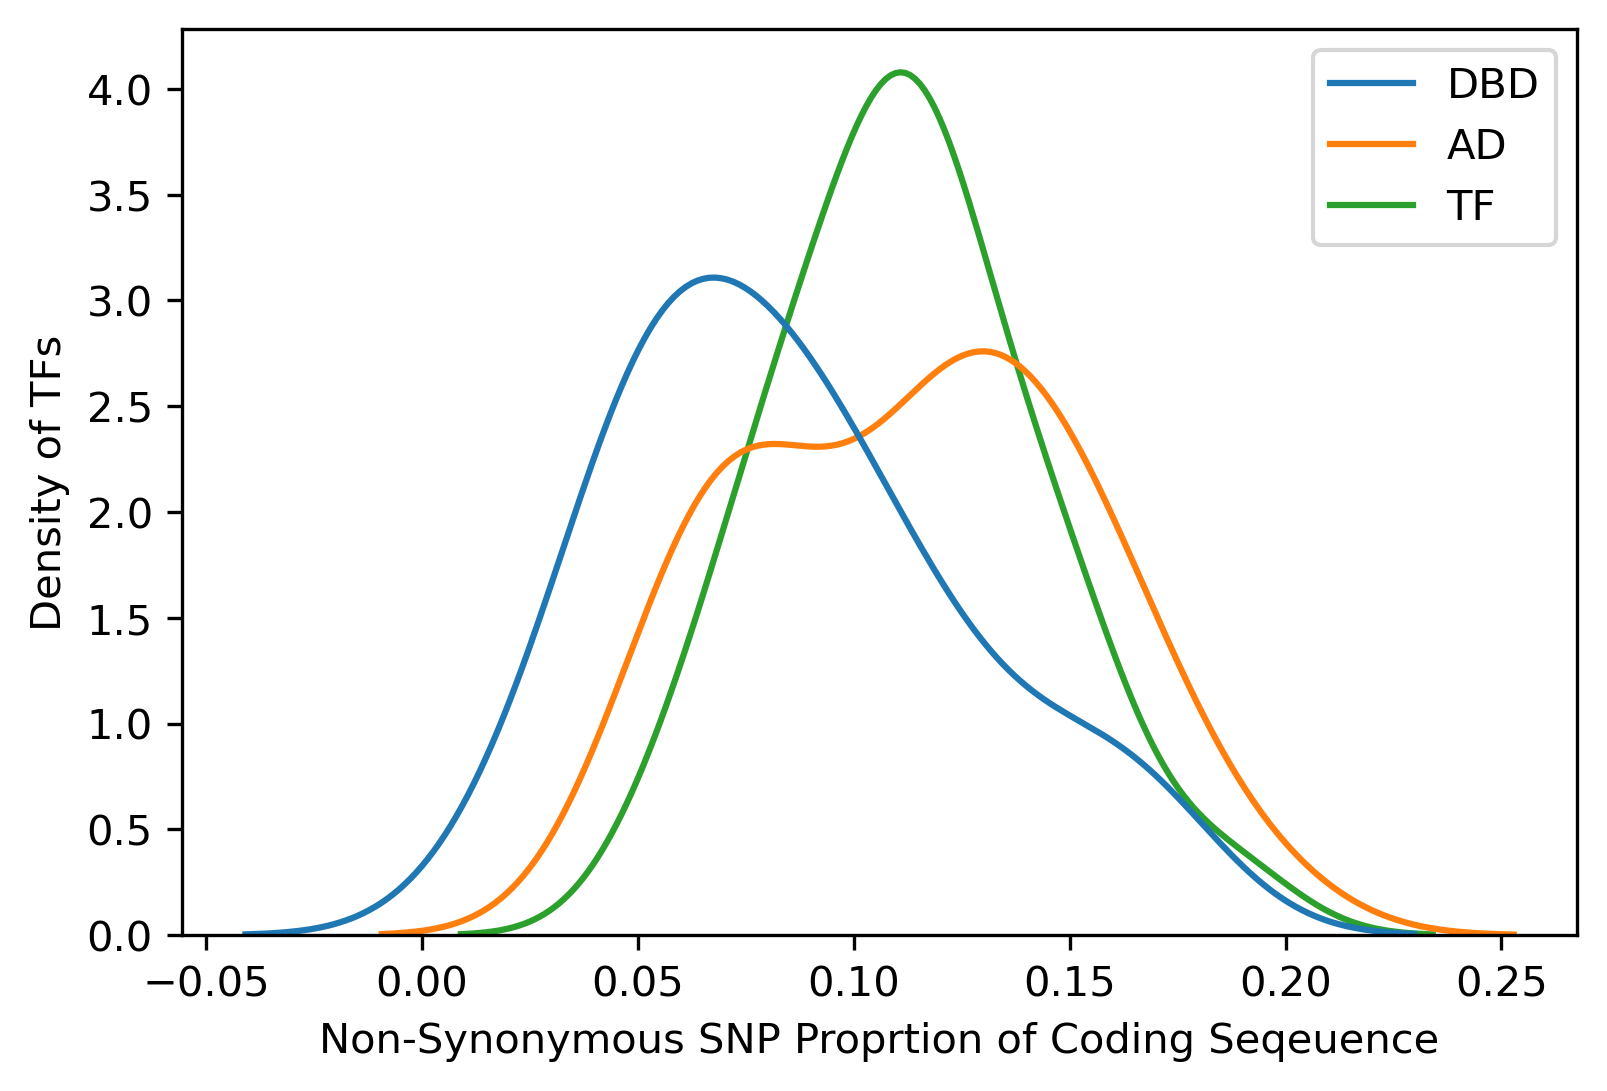

In [56]:
plt.figure(figsize=(6,4), dpi = 300)

temp_tbl = expanded_results[["DBD_prop", "AD_prop", "TF_prop"]]
temp_tbl = temp_tbl.rename(columns = {"DBD_prop": "DBD",
                                     "AD_prop": "AD", 
                                     "TF_prop" : "TF"})
sns.kdeplot(data = temp_tbl)
plt.xlabel("Non-Synonymous SNP Proprtion of Coding Seqeuence")
plt.ylabel("Density of TFs")

plt.show;

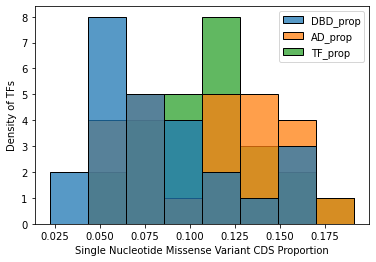

In [108]:
sns.histplot(data = expanded_results[["DBD_prop", "AD_prop", "TF_prop"]])
plt.xlabel("Single Nucleotide Missense Variant CDS Proportion")
plt.ylabel("Density of TFs");

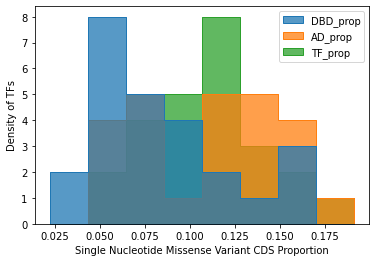

In [106]:
sns.histplot(expanded_results[["DBD_prop", "AD_prop", "TF_prop"]], element = "step")
plt.xlabel("Single Nucleotide Missense Variant CDS Proportion")
plt.ylabel("Density of TFs");

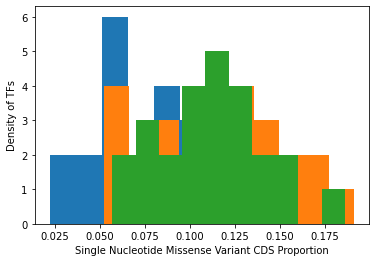

In [110]:
plt.hist(expanded_results["DBD_prop"])
plt.hist(expanded_results["AD_prop"])
plt.hist(expanded_results["TF_prop"])
plt.xlabel("Single Nucleotide Missense Variant CDS Proportion")
plt.ylabel("Density of TFs");

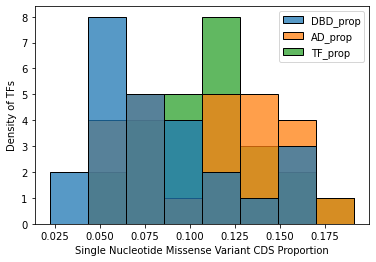

In [116]:
sns.histplot(expanded_results[["DBD_prop", "AD_prop", "TF_prop"]], multiple = "stack")
plt.xlabel("Single Nucleotide Missense Variant CDS Proportion")
plt.ylabel("Density of TFs");

In [124]:
DBD_prop_df = expanded_results[["DBD_prop"]]
DBD_prop_df = DBD_prop_df.rename(columns = {"DBD_prop": "prop"})
DBD_prop_df["dom"] = "DBD"

AD_prop_df = expanded_results[["AD_prop"]]
AD_prop_df = AD_prop_df.rename(columns = {"AD_prop": "prop"})
AD_prop_df["dom"] = "AD"

TF_prop_df = expanded_results[["TF_prop"]]
TF_prop_df = TF_prop_df.rename(columns = {"TF_prop": "prop"})
TF_prop_df["dom"] = "TF"

concat_df = pd.concat([DBD_prop_df, AD_prop_df, TF_prop_df])
concat_df

,prop,dom
0,0.103175,DBD
1,0.061111,DBD
2,0.116883,DBD
3,0.030303,DBD
4,0.022222,DBD
...,...,...
20,0.084861,TF
21,0.156716,TF
22,0.103741,TF
23,0.101408,TF


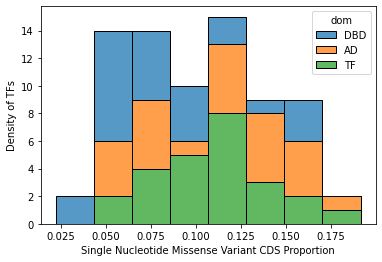

In [127]:
sns.histplot(data = concat_df, x = "prop", hue = "dom", multiple = "stack")
plt.xlabel("Single Nucleotide Missense Variant CDS Proportion")
plt.ylabel("Density of TFs");

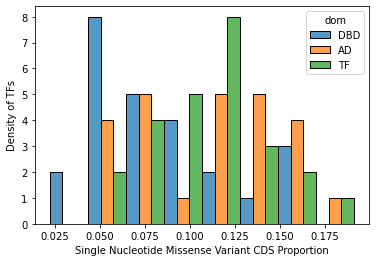

In [129]:
sns.histplot(data = concat_df, x = "prop", hue = "dom", multiple = "dodge")
plt.xlabel("Single Nucleotide Missense Variant CDS Proportion")
plt.ylabel("Density of TFs");

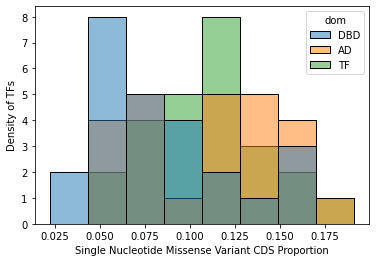

In [130]:
sns.histplot(data = concat_df, x = "prop", hue = "dom", multiple = "layer")
plt.xlabel("Single Nucleotide Missense Variant CDS Proportion")
plt.ylabel("Density of TFs");

In [26]:
def add_AD_DBD_chi_sq_p_vals(results):
    # AD vs rest of TF
    AD_chi_sq_p_vals = []
    # DBDD vs rest of TF
    DBD_chi_sq_p_vals = []

    for i in results.index:
        exp_freq = results["TF_missense"].iloc[i] / results["TF_cds_length"].iloc[i] 

        AD_obs = results["AD_missense"].iloc[i] 
        AD_exp = exp_freq * results["AD_cds_length"].iloc[i] 

        DBD_obs = results["DBD_missense"].iloc[i]
        DBD_exp = exp_freq * results["DBD_cds_length"].iloc[i]

        non_AD_DBD_obs = results["TF_missense"].iloc[i] - AD_obs - DBD_obs
        non_AD_DBD_exp = exp_freq * (results["TF_cds_length"].iloc[i] - results["AD_cds_length"].iloc[i] - results["DBD_cds_length"].iloc[i])

        AD_chi_sq_p_vals.append(chisquare(f_obs = [AD_obs, DBD_obs + non_AD_DBD_obs], f_exp = [AD_exp, DBD_exp + non_AD_DBD_exp])[1])
        DBD_chi_sq_p_vals.append(chisquare(f_obs = [DBD_obs, AD_obs + non_AD_DBD_obs], f_exp = [DBD_exp, AD_exp + non_AD_DBD_exp])[1])

    results["AD_chi_sq_p_val"] = AD_chi_sq_p_vals
    results["DBD_chi_sq_p_val"] = DBD_chi_sq_p_vals

In [27]:
add_AD_DBD_chi_sq_p_vals(expanded_results)
expanded_results

,uniprotID,TF_cds_length,AD_cds_length,DBD_cds_length,TF_missense,AD_missense,DBD_missense,AD_prop,DBD_prop,TF_prop,chi_sq_p_val,AD_chi_sq_p_val,DBD_chi_sq_p_val
0,O94983,3609,882,378,424,119,39,0.134921,0.103175,0.117484,1.919054e-01,0.082206,0.390982
1,Q96QS3,1689,273,180,207,22,11,0.080586,0.061111,0.122558,1.647562e-03,0.030505,0.012726
2,P20393,1845,834,231,265,121,27,0.145084,0.116883,0.143631,5.007770e-01,0.881144,0.251424
3,P35398,1572,342,198,174,38,6,0.111111,0.030303,0.110687,1.040225e-03,0.978739,0.000276
4,Q9UGU0,5883,981,45,734,118,1,0.120285,0.022222,0.124766,1.297410e-01,0.663366,0.050589
5,Q03164,11910,420,36,985,25,3,0.059524,0.083333,0.082704,2.431214e-01,0.092612,0.989502
6,P78337,945,150,180,145,23,22,0.153333,0.122222,0.153439,4.771902e-01,0.997122,0.234696
7,O95096,822,162,180,153,31,30,0.191358,0.166667,0.186131,7.908934e-01,0.863373,0.493391
8,O14770,1434,414,189,168,46,10,0.111111,0.052910,0.117155,1.116241e-02,0.670116,0.005617
9,P43354,1797,315,228,200,23,21,0.073016,0.092105,0.111297,3.275886e-02,0.024925,0.352580


In [28]:
sig_AD_rows = expanded_results[expanded_results["AD_chi_sq_p_val"] < (0.05/20)]
sig_AD_rows

,uniprotID,TF_cds_length,AD_cds_length,DBD_cds_length,TF_missense,AD_missense,DBD_missense,AD_prop,DBD_prop,TF_prop,chi_sq_p_val,AD_chi_sq_p_val,DBD_chi_sq_p_val
18,P11308,1461,549,243,156,88,32,0.160291,0.131687,0.106776,4.778119e-08,0.000001,0.193071
20,P10827,1473,156,225,125,26,18,0.166667,0.080000,0.084861,9.907578e-04,0.000208,0.785683


In [34]:
pd.merge(SFARI_TFs, sig_AD_rows, on = "uniprotID")

,Unnamed: 0.1,Unnamed: 0,status,gene-symbol,gene-name,ensembl-id,chromosome,genetic-category,gene-score,syndromic,...,DBD_cds_length,TF_missense,AD_missense,DBD_missense,AD_prop,DBD_prop,TF_prop,chi_sq_p_val,AD_chi_sq_p_val,DBD_chi_sq_p_val
0,29,31,9,ERG,"ERG, ETS transcription factor",ENSG00000157554,21,Genetic Association,2.0,0,...,243,156,88,32,0.160291,0.131687,0.106776,4.778119e-08,0.000001,0.193071
1,100,104,9,THRA,thyroid hormone receptor alpha,ENSG00000126351,17,"Rare Single Gene Mutation, Functional",2.0,0,...,225,125,26,18,0.166667,0.080000,0.084861,9.907578e-04,0.000208,0.785683


In [29]:
sig_DBD_rows = expanded_results[expanded_results["DBD_chi_sq_p_val"] < (0.05/20)]
sig_DBD_rows

,uniprotID,TF_cds_length,AD_cds_length,DBD_cds_length,TF_missense,AD_missense,DBD_missense,AD_prop,DBD_prop,TF_prop,chi_sq_p_val,AD_chi_sq_p_val,DBD_chi_sq_p_val
3,P35398,1572,342,198,174,38,6,0.111111,0.030303,0.110687,0.001040,0.978739,0.000276
22,Q02548,1176,165,381,122,27,18,0.163636,0.047244,0.103741,0.000058,0.009989,0.000031


In [35]:
pd.merge(SFARI_TFs, sig_DBD_rows, on = "uniprotID")

,Unnamed: 0.1,Unnamed: 0,status,gene-symbol,gene-name,ensembl-id,chromosome,genetic-category,gene-score,syndromic,...,DBD_cds_length,TF_missense,AD_missense,DBD_missense,AD_prop,DBD_prop,TF_prop,chi_sq_p_val,AD_chi_sq_p_val,DBD_chi_sq_p_val
0,65,68,9,PAX5,Paired box 5,ENSG00000196092,9,Rare Single Gene Mutation,1.0,0,...,381,122,27,18,0.163636,0.047244,0.103741,0.000058,0.009989,0.000031
1,75,78,9,RORA,RAR-related orphan receptor A,ENSG00000069667,15,"Rare Single Gene Mutation, Syndromic, Genetic ...",NaN,1,...,198,174,38,6,0.111111,0.030303,0.110687,0.001040,0.978739,0.000276


In [33]:
# 3 - way chi square significant rows
tbl

,uniprotID,TF_cds_length,AD_cds_length,DBD_cds_length,TF_missense,AD_missense,DBD_missense,AD_prop,DBD_prop,TF_prop,chi_sq_p_val,gene-symbol,gene-name,AD_prot_length
0,Q96QS3,1689,273,180,207,22,11,0.080586,0.061111,0.122558,1.647562e-03,ARX,aristaless related homeobox,91.0
1,P35398,1572,342,198,174,38,6,0.111111,0.030303,0.110687,1.040225e-03,RORA,RAR-related orphan receptor A,114.0
2,Q9NQB0,1860,300,207,204,19,11,0.063333,0.053140,0.109677,2.849705e-04,TCF7L2,Transcription factor 7-like 2 (T-cell specific...,100.0
3,P11308,1461,549,243,156,88,32,0.160291,0.131687,0.106776,4.778119e-08,ERG,"ERG, ETS transcription factor",183.0
4,P10827,1473,156,225,125,26,18,0.166667,0.080000,0.084861,9.907578e-04,THRA,thyroid hormone receptor alpha,52.0
5,Q02548,1176,165,381,122,27,18,0.163636,0.047244,0.103741,5.822030e-05,PAX5,Paired box 5,55.0
